<a href="https://colab.research.google.com/github/jawwadkareem/Car-Price-Predictor-Machine-Learning-Project-/blob/main/CS_21103%2C_CS_21125%2C_CS_21137_ML_OEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/My Drive/Dataset/pakwheels_preprocessed_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55340 entries, 0 to 55339
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          55340 non-null  object 
 1   model         55340 non-null  object 
 2   year          55340 non-null  float64
 3   engine        55340 non-null  float64
 4   transmission  55340 non-null  object 
 5   fuel          55340 non-null  object 
 6   mileage       55340 non-null  int64  
 7   price         55340 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 3.4+ MB


In [ ]:
df.columns.tolist()

['make', 'model', 'year', 'engine', 'transmission', 'fuel', 'mileage', 'price']

In [ ]:
df.nunique()

make              51
model            310
year              31
engine            60
transmission       2
fuel               3
mileage         6527
price           1590
dtype: int64

In [ ]:
df.describe()

,year,engine,mileage,price
count,55340.000000,55340.000000,55340.000000,5.534000e+04
mean,2013.664402,1245.062017,85520.110408,2.978008e+06
std,6.609833,392.483890,49394.071193,1.768713e+06
min,1992.000000,660.000000,5000.000000,4.000000e+05
25%,2009.000000,1000.000000,46000.000000,1.525000e+06
50%,2015.000000,1300.000000,82895.000000,2.650000e+06
75%,2019.000000,1500.000000,120000.000000,4.100000e+06
max,2022.000000,2400.000000,200000.000000,8.000000e+06


<Axes: xlabel='year', ylabel='price'>

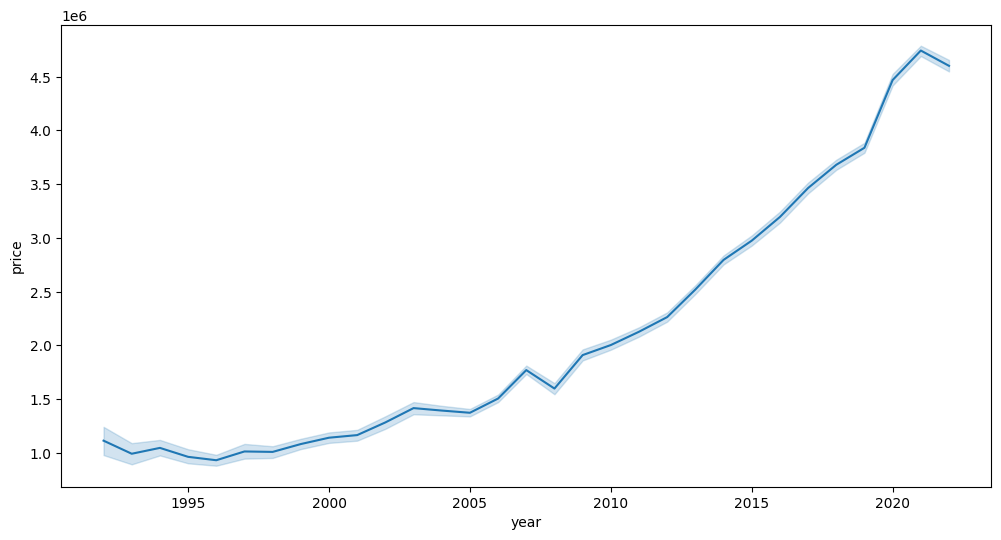

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(y='price', x='year', data=df)

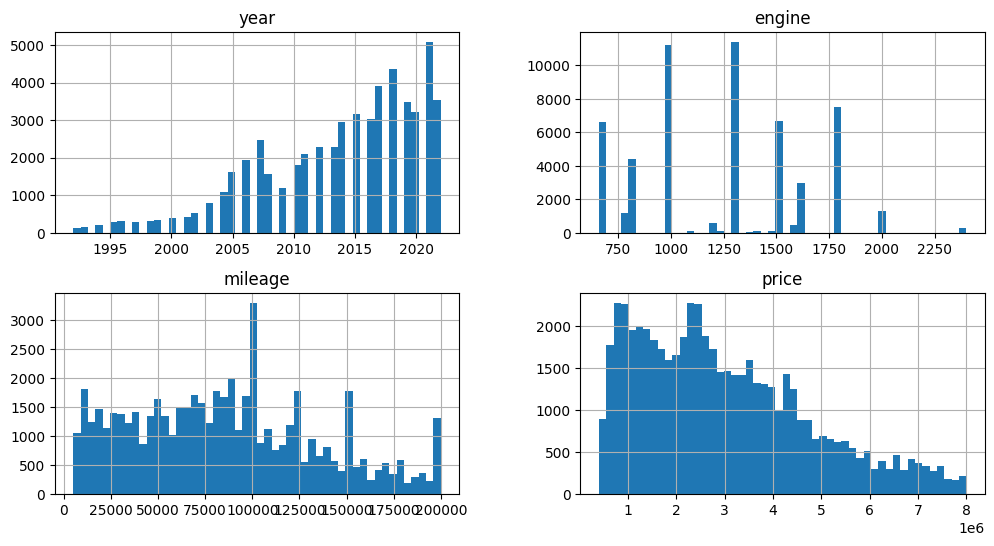

In [ ]:
df.hist(bins=50, figsize=(12,6))
plt.show()

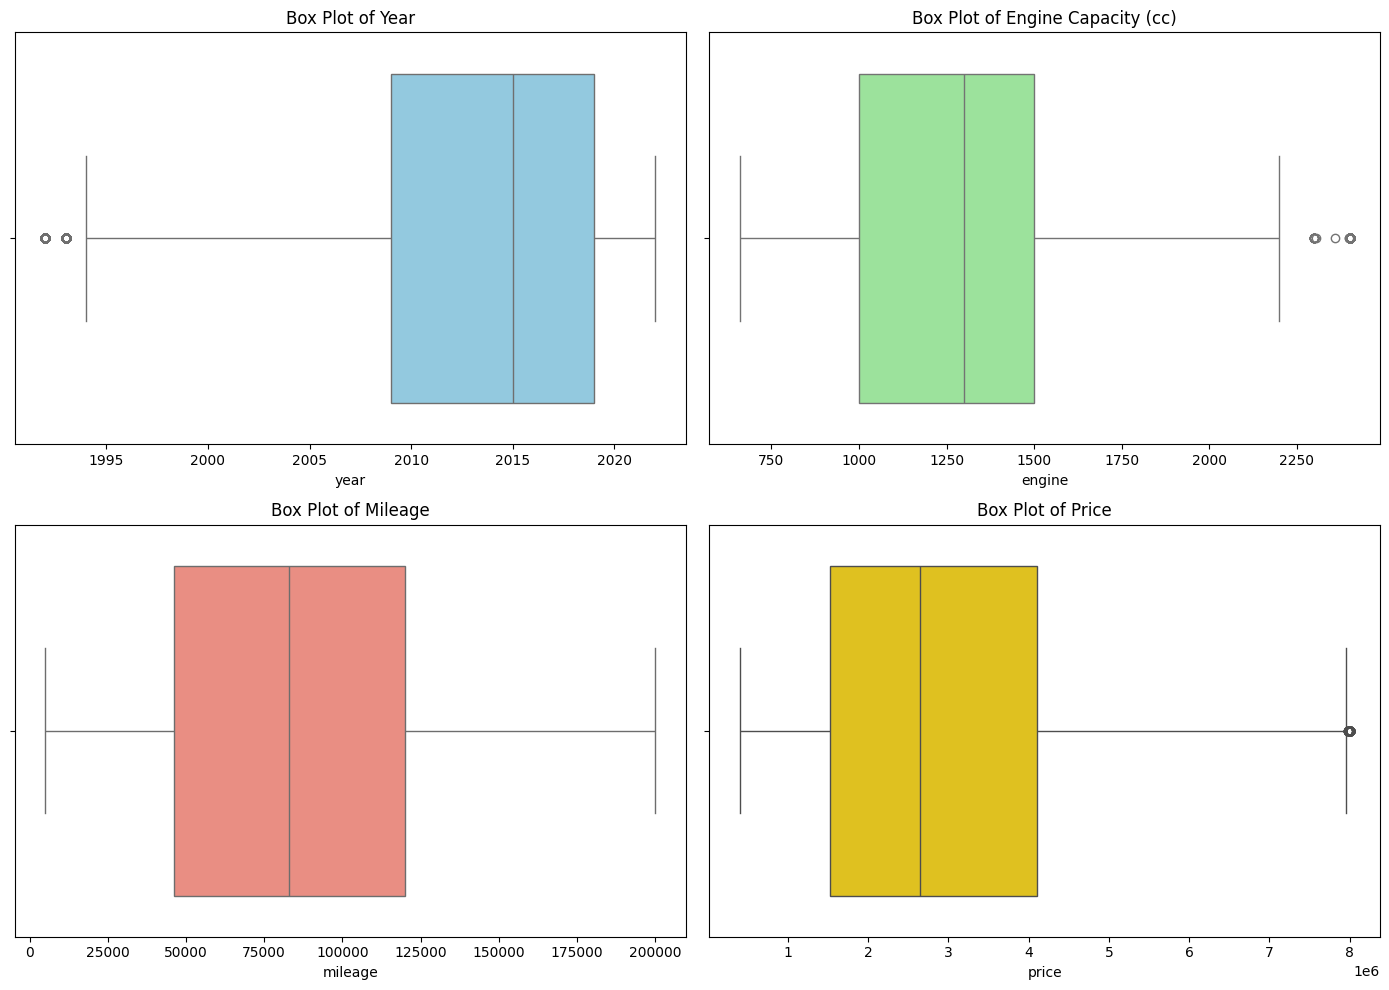

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Year
sns.boxplot(x=df['year'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Box Plot of Year')

# Engine
sns.boxplot(x=df['engine'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Box Plot of Engine Capacity (cc)')

# Mileage
sns.boxplot(x=df['mileage'], ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Box Plot of Mileage')

# Price
sns.boxplot(x=df['price'], ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Box Plot of Price')

plt.tight_layout()
plt.show()


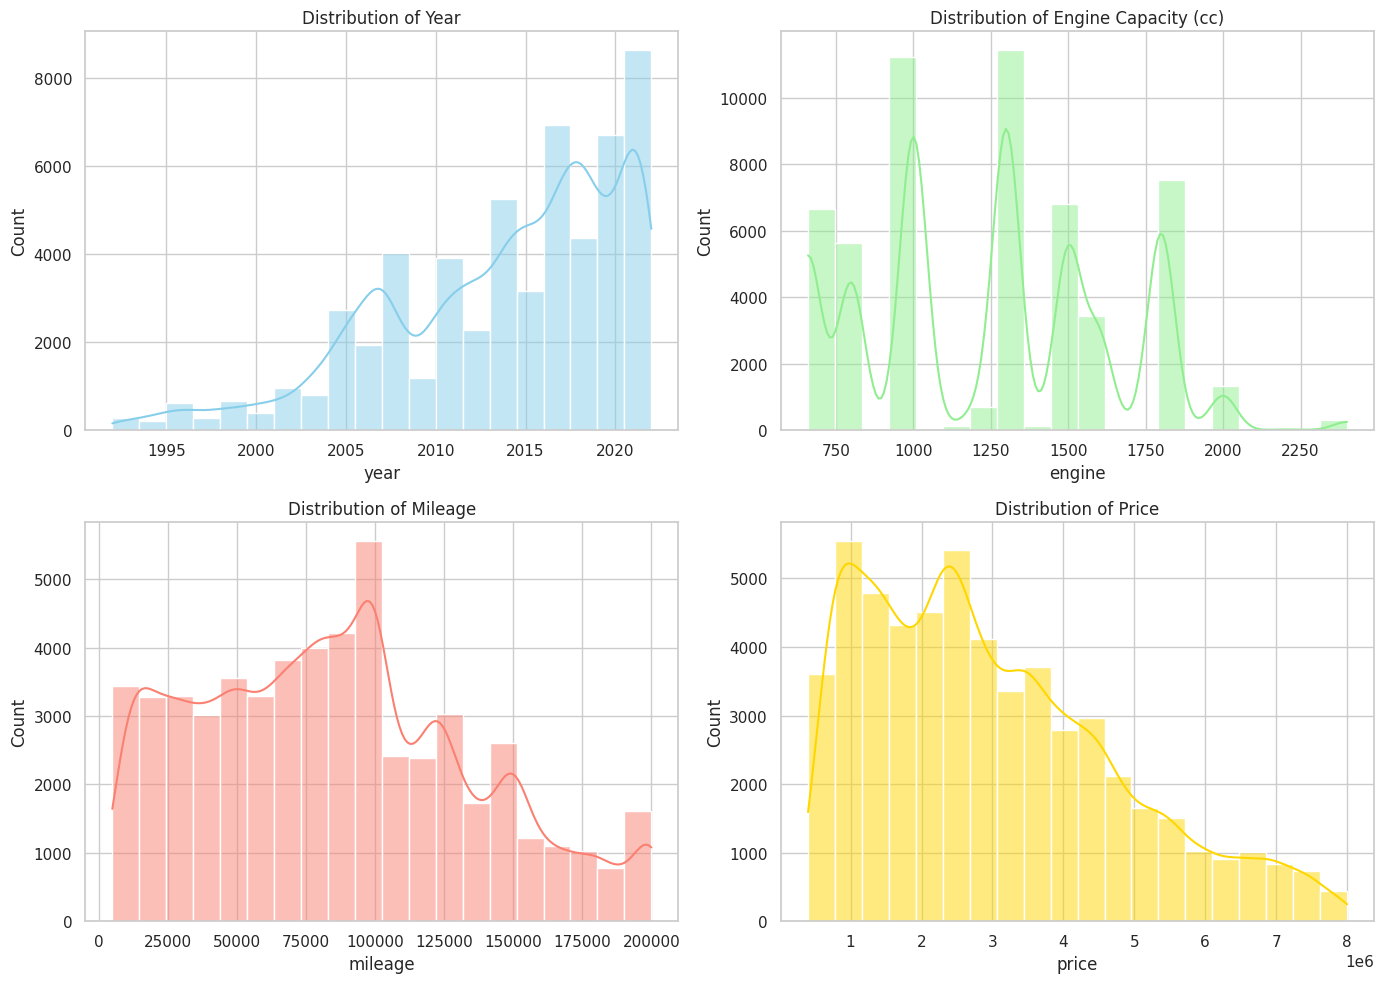

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Year
sns.histplot(df['year'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Year')

# Engine
sns.histplot(df['engine'], bins=20, kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribution of Engine Capacity (cc)')

# Mileage
sns.histplot(df['mileage'], bins=20, kde=True, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Distribution of Mileage')

# Price
sns.histplot(df['price'], bins=20, kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribution of Price')

plt.tight_layout()
plt.show()


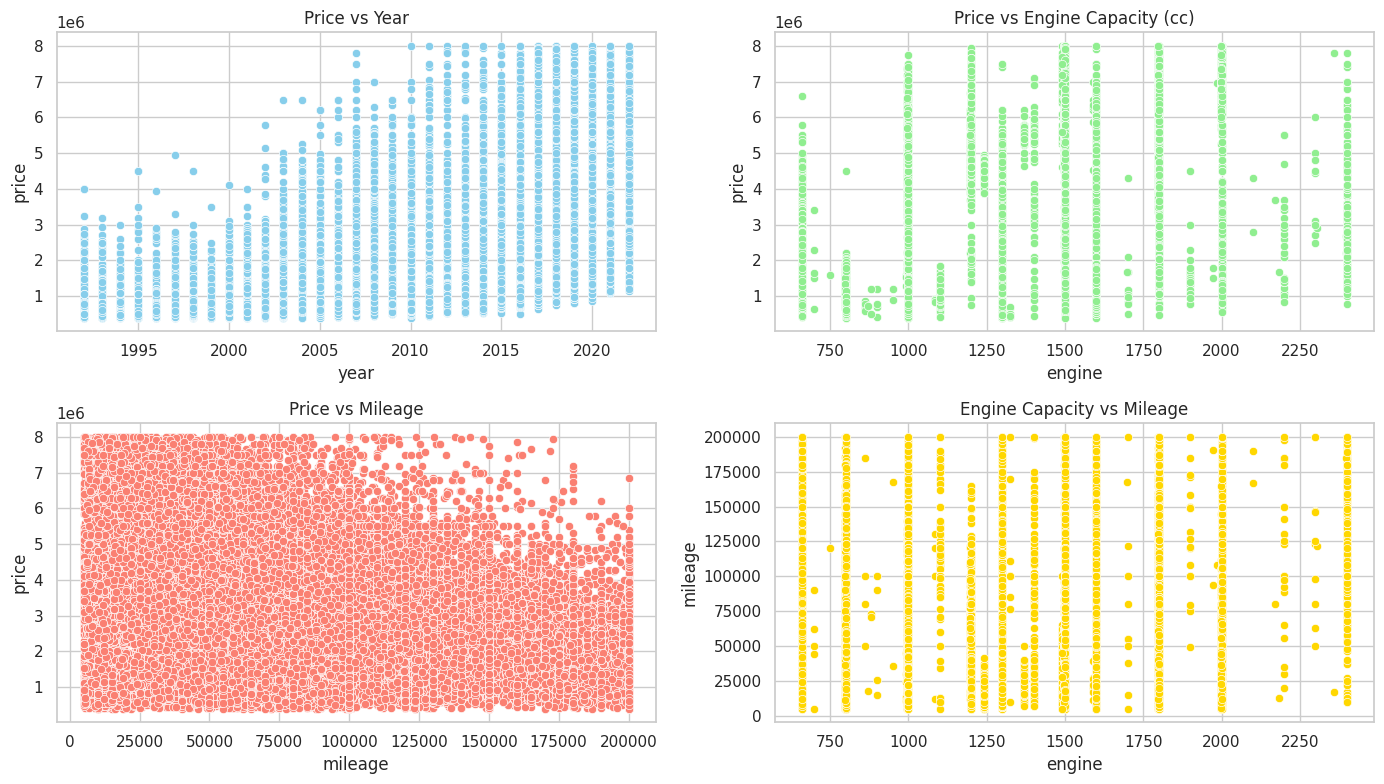

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Price vs Year
sns.scatterplot(x=df['year'], y=df['price'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Price vs Year')

# Price vs Engine
sns.scatterplot(x=df['engine'], y=df['price'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Price vs Engine Capacity (cc)')

# Price vs Mileage
sns.scatterplot(x=df['mileage'], y=df['price'], ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Price vs Mileage')

# Engine vs Mileage
sns.scatterplot(x=df['engine'], y=df['mileage'], ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Engine Capacity vs Mileage')

plt.tight_layout()
plt.show()


In [ ]:
# Top 10 car makers in dataset
top_10 = df['make'].value_counts().head(10).reset_index()
top_10.columns  = ['Cars','Counts']
top_10.index+=1
print(top_10)

          Cars  Counts
1       Suzuki   17483
2       Toyota   16079
3        Honda   13146
4     Daihatsu    2457
5          KIA    1175
6       Nissan     998
7      Hyundai     686
8      Changan     674
9   Mitsubishi     638
10          MG     367


In [ ]:
fuel_count = df['fuel'].value_counts().reset_index()
print(fuel_count)

     fuel  count
0  Petrol  52925
1  Hybrid   2080
2  Diesel    335


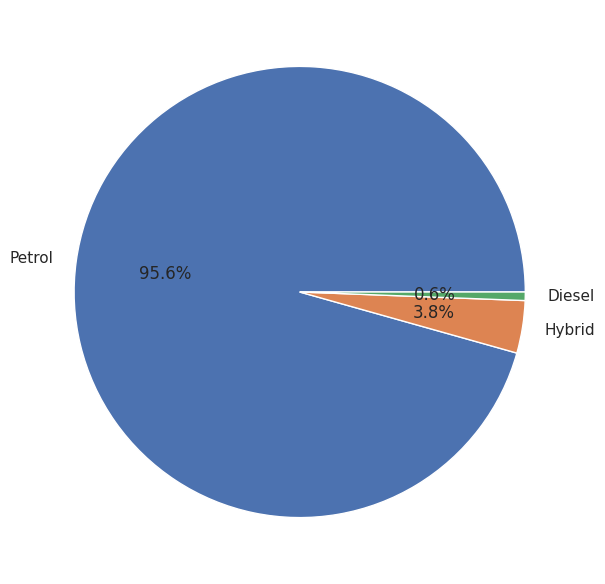

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(x='count', labels='fuel', autopct='%1.1f%%', data=fuel_count)
plt.tight_layout()
plt.show()

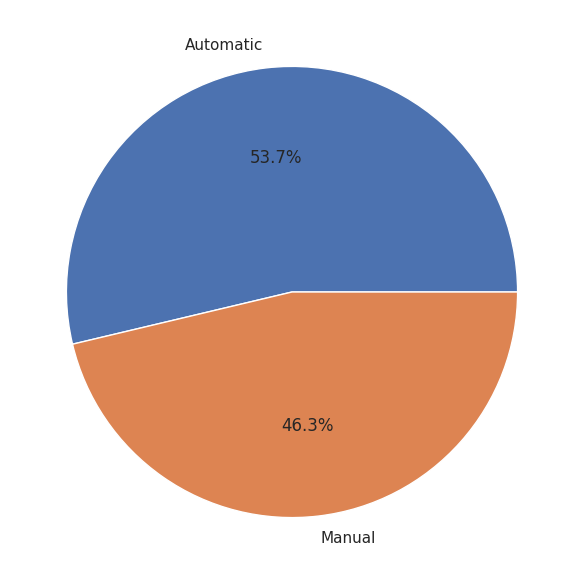

In [ ]:
transmission_count = df['transmission'].value_counts().reset_index()
plt.figure(figsize=(12,6))
plt.pie(x='count', labels='transmission', autopct='%1.1f%%', data=transmission_count)
plt.tight_layout()
plt.show()

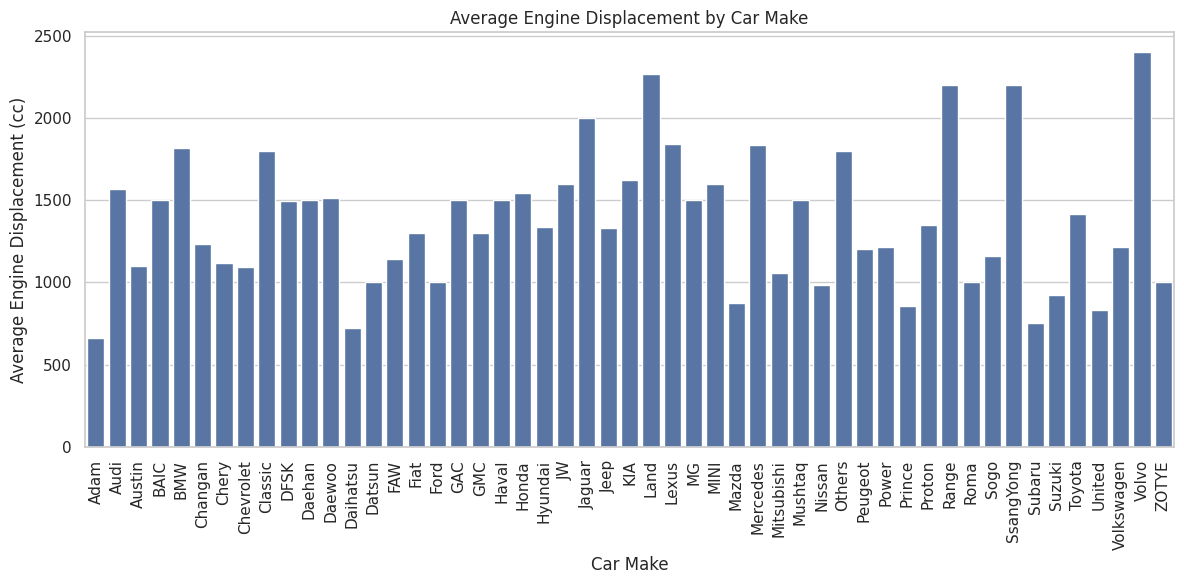

In [ ]:
engine_make_avg = df.groupby(['make'])['engine'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='make', y='engine', data=engine_make_avg)
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Average Engine Displacement (cc)')
plt.title('Average Engine Displacement by Car Make')
plt.tight_layout()

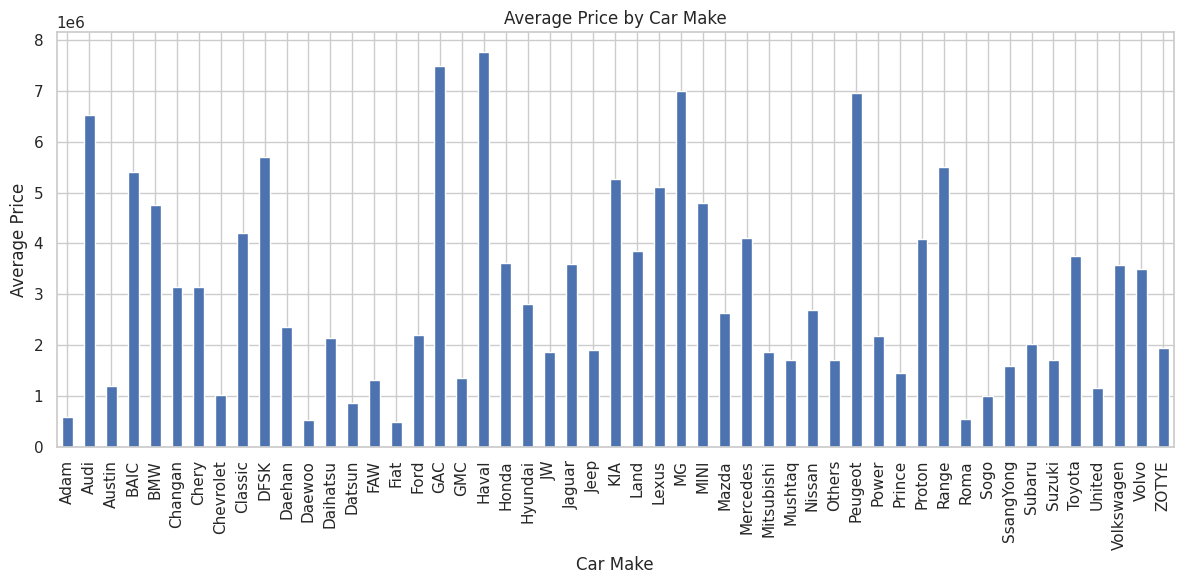

In [ ]:
make_avg_price = df.groupby('make')['price'].mean()
plt.figure(figsize=(12, 6))
make_avg_price.plot(kind='bar')
plt.xlabel('Car Make')
plt.ylabel('Average Price')
plt.title('Average Price by Car Make')
plt.xticks(rotation=90)
plt.tight_layout()

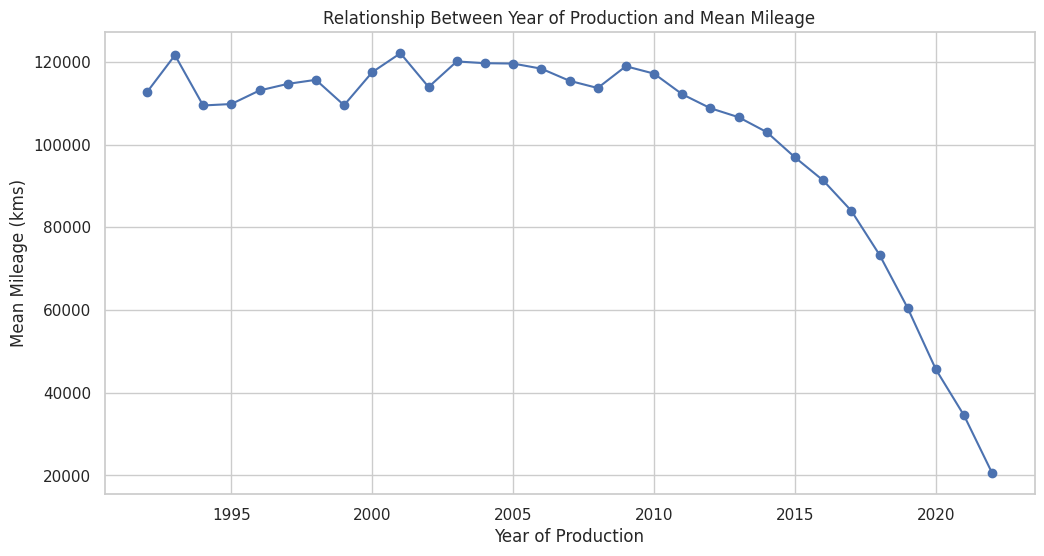

In [ ]:
mean_mileage_by_year = df.groupby('year')['mileage'].mean()
plt.figure(figsize=(12, 6))
plt.plot(mean_mileage_by_year.index, mean_mileage_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year of Production')
plt.ylabel('Mean Mileage (kms)')
plt.title('Relationship Between Year of Production and Mean Mileage')
plt.grid(True)